# Лаборатоная работа №5.
## Решение СЛАУ. Численное интегрирование
### Задание. Вариант 3.
Решить для $n=10000$ методом простой итерации систему уравнений с относительной точностью $\epsilon=0.001$:
$$ \left\{{\begin{array}{rcl}n^3x_i=\sum_{j=1}^n \frac{j+cos(j)}{1+j^2+i^2}x_j+\int \limits _{{1}}^{{3}}ln(i+cos(t))dt,\quad i=1,...,n\end{array}}\right.$$.
Для вычисления интеграла с относительной точностью $\epsilon=$0.01 использовать рекуррентную формулу трапеций.

### Рекуррентная квадратурная формула трапеций.
Определим
$$T(0) = \frac{h}{2}(f(a) + f(b)),\quad h = a − b.$$
Затем для каждого $N >= 1$ определим $$T(N) = T(f, h),$$ где $T(f, h)$- формула трапеций с шагом $h = \frac{a − b}{2^N}$.
Тогда $$T(N) = \frac{T(N − 1)}{2}+h\sum_{k=1}^M f(x_{2k−1}) \quad (*)$$, $ N = 1, 2 . . . , $ где $h = \frac{b−a}{2}$
$N$ и точки $x_k = a+kh$ делят интервал $[a, b]$ на $2^N = 2M$ точек.


## Метод простой итерации.
Метод заключается в последовательном вычислении координат $k+1$-го приближения через ранее вычисленное $k$-е.
Пусть дана СЛАУ $Ax=B$, где $A$-матрица размера $n*n$, $B$- n-мерный вектор, $x$-искомый вектор-решение. Тогда решение системы запишется в покоординатном виде: $$ x_i^{k+1}=\frac{b_i+\sum_{j=1}^n a_{ij}x_i^k}{-a_{ii}}$$
В качестве $x_k$ используется нулевое приближение

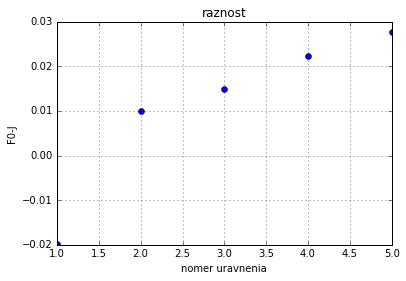

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import log, trapz, linspace, nan, cos
plt.grid(True)
#подинтегральная функция
def f(t, i):
    return log(i+cos(t))
#вычисление интеграла с заданной точностью
def J(n):
    a=1
    b=3
    e=0.01
    T0=((b-a)/2)*(f(a, n)+f(b, n))
    s=0
    J0=T0
    J1=0
    Tn=0
    kj=1000
    l=2
    while kj>e:
        h=(b-a)/(2**l)
        for p in range(1, 2**(l-1)):
            s+=f(a+(2*p-1)*h, n)
        J1=J0/2+h*s/2
        kj=ki=abs(J0-J1)/abs(J1)
        l+=1
        J0=J1
    return J0
#сравнение интегралов вычисленных по формуле симпсона и встроеной функцией trapz
F=0
F0=0
v=linspace(1, 5, 5)
x=linspace(1, 3, 1000)
F0=[trapz(f(x, y), dx=0.002)-J(y) for y in v]
plt.title('raznost')
plt.plot(v,F0,'bo')
plt.xlabel('nomer uravnenia')
plt.ylabel('F0-J')
plt.show()


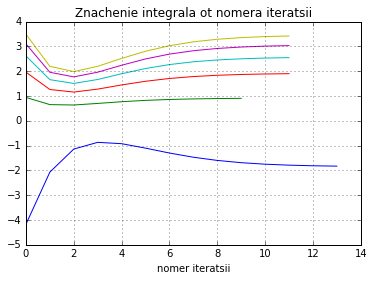

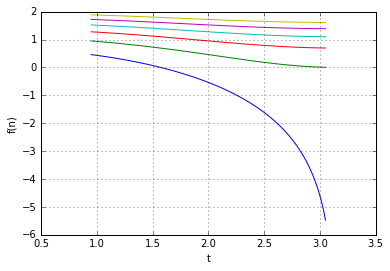

In [8]:
%matplotlib inline
from numpy import zeros, log, sin, cos, sqrt, linspace
from numpy.linalg import solve, norm
import matplotlib.pyplot as plt
#подинтегральная функция
def f(t, i):
    return log(i+cos(t))

#вычисление интеграла с заданной точностью
plt.title('Znachenie integrala ot nomera iteratsii')
plt.grid(True)
plt.xlabel('nomer iteratsii')
for j in range(1, 7):
    JJ=[]
    a=1
    b=3
    e=0.01
    T0=((b-a)/2)*(f(a, j)+f(b, j))
    s=0
    J0=T0
    JJ.append(J0)
    J1=0
    Tn=0
    kj=1000
    l=2
    while kj>e:
        h=(b-a)/(2**(l))
        for p in range(1, 2**(l-1)):
            s+=f(a+(2*p-1)*h, j)
        J1=J0/2+h*s/2
        kj=ki=abs(J0-J1)/abs(J1)
        l+=1
        J0=J1
        JJ.append(J0)
    plt.plot(JJ, )

plt.show()
plt.grid(True)
plt.ylabel('f(n)')
plt.xlabel('t')
#построение подинтегральной функции
for t in range(1, 7):
    p=linspace(0.95, 3.05, 100)
    u=f(p, t)
    plt.plot(p, u)
plt.show()

Количество уравнений:
10
Решение встроеной функцией
[-0.00182304  0.00091074  0.00190391  0.00255041  0.00303504  0.00342338
  0.00374733  0.0040251   0.00426833  0.00448487]
--------------------------------------
Решение методом простой итерации, за шагов:  2
[[-0.00183754  0.00090092  0.00189657  0.00254505  0.00303038  0.00341884
   0.00374313  0.0040217   0.00426588  0.0044831 ]]


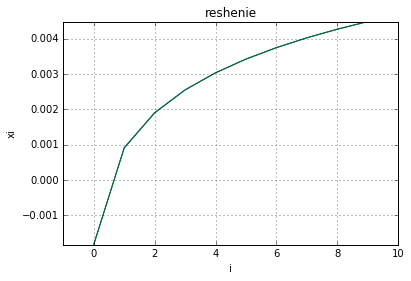

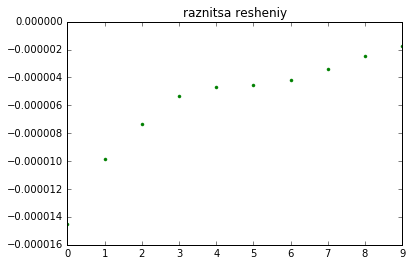

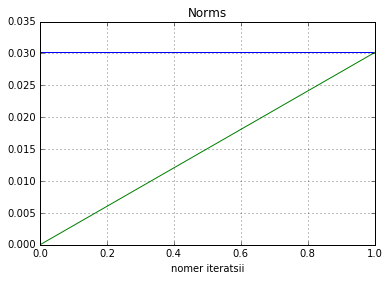

In [15]:
%matplotlib inline
from numpy import zeros, log, sin, cos, sqrt, linspace, nan, set_printoptions
from numpy.linalg import solve, norm
import matplotlib.pyplot as plt
set_printoptions(threshold=nan)
#подинтегральная функция
def f(t, i):
    return log(i+cos(t))
#вычисление интеграла с заданной точностью
def J(n):
    a=1
    b=3
    e=0.01
    T0=((b-a)/2)*(f(a, n)+f(b, n))
    s=0
    J0=T0
    J1=0
    Tn=0
    kj=1000
    l=2
    while kj>e:
        h=(b-a)/(2**l)
        for p in range(1, 2**(l-1)):
            s+=f(a+(2*p-1)*h, n)
        J1=J0/2+h*s/2
        kj=ki=abs(J0-J1)/abs(J1)
        l+=1
        J0=J1
    return J0

#задаем матрицу А и матрицу b
n=int(input('Количество уравнений:\n'))
b=[]
a=zeros((n,n))

for i in range(0, n):
    b.append((-J(i+1)))


for i in range(0, n):
        for j in range(0, n):
            if i==j:
                a[i][j]=(j+cos(i))/(1+j**2+i**2)-n**3
            else:
                a[i][j]=(j+cos(i))/(1+j**2+i**2)
#решаем встроенной функцией
xx=solve(a, b)
if n<=20:
    print('Решение встроеной функцией')
    print(xx)
#решаем методом простой итерации
eps=0.001
kj=99999
l=1
x=zeros((n,1))
norma=[]
ol=[]
while kj>eps:
    x1=zeros((n,1))  
    k1=0
    k0=0
    for i in range(0, n):
        v=0
        for j in range(0, n):
            if i==j:
                v+=0
            else:
                v+=(a[i][j])*x[j]
        x1[i]=(-v-b[i])/(n**3-(i+cos(i))/(1+2*i**2))
    kj=(norm((x-x1), 1))/norm(x1, 1)
    norma.append(norm(x,1))
    ol.append(norm(xx, 1))
    x=x1
    l+=1

x.shape = (1, n)
print('--------------------------------------')
print('Решение методом простой итерации, за шагов: ', l-1)
if n<=1000:
    print(x)
#строим решение(координату от ее номера)
x.shape = (n, 1)
plt.plot(xx, )
plt.plot(x, )
plt.grid(True)
plt.title('reshenie')
plt.ylabel('xi')
plt.xlabel('i')
plt.axis([-1, n, min(x), max(x)])
plt.show()
for j in range(0,n):
    plt.plot(j,x[j]-xx[j],'g.' )
plt.title('raznitsa resheniy')
plt.xlabel('i')
plt.show()
#строим график норм решений
plt.grid(True)
plt.title('Norms')
plt.plot(ol)
plt.plot(norma)
plt.xlabel('nomer iteratsii')
plt.show()